In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("E:/Research/"))

['Anaconda3-2019.10-Windows-x86_64.exe', 'heart.csv', 'Research']


In [2]:
data = pd.read_csv('E:/Research/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print('Data Last 5 Rows Show\n')
data.tail()

Data Last 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
print('Data Show Describe\n')
data.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print('Data Show Info\n')
data.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#We will list all the columns for all data. We check all columns. Is there any spelling mistake?
print('Data Show Columns:\n')
data.columns

Data Show Columns:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.sample(frac=0.01)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0


In [8]:
#sample; random rows in dataset
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [10]:
#New show columns
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [11]:
#And, how many rows and columns are there for all data?
print('Data Shape Show\n')
data.shape  #first one is rows, other is columns

Data Shape Show



(303, 14)

In [12]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [13]:
#all rows control for null values
data.isnull().values.any()

False

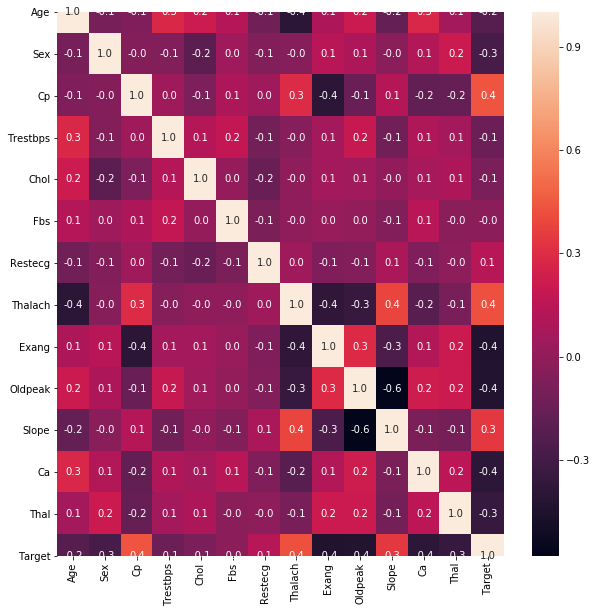

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

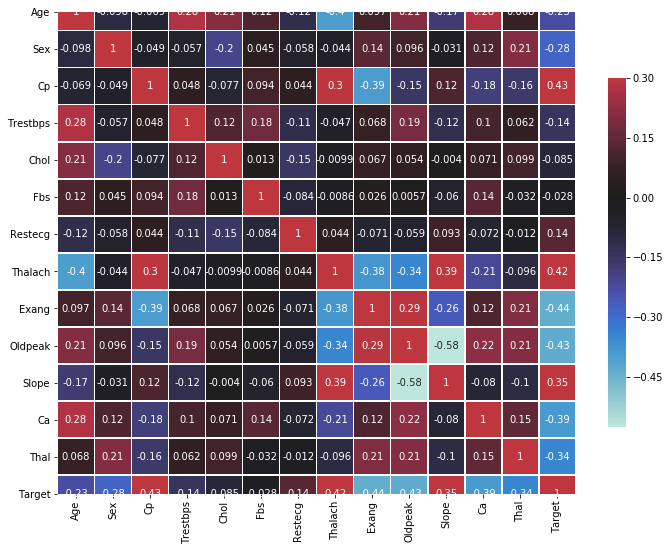

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

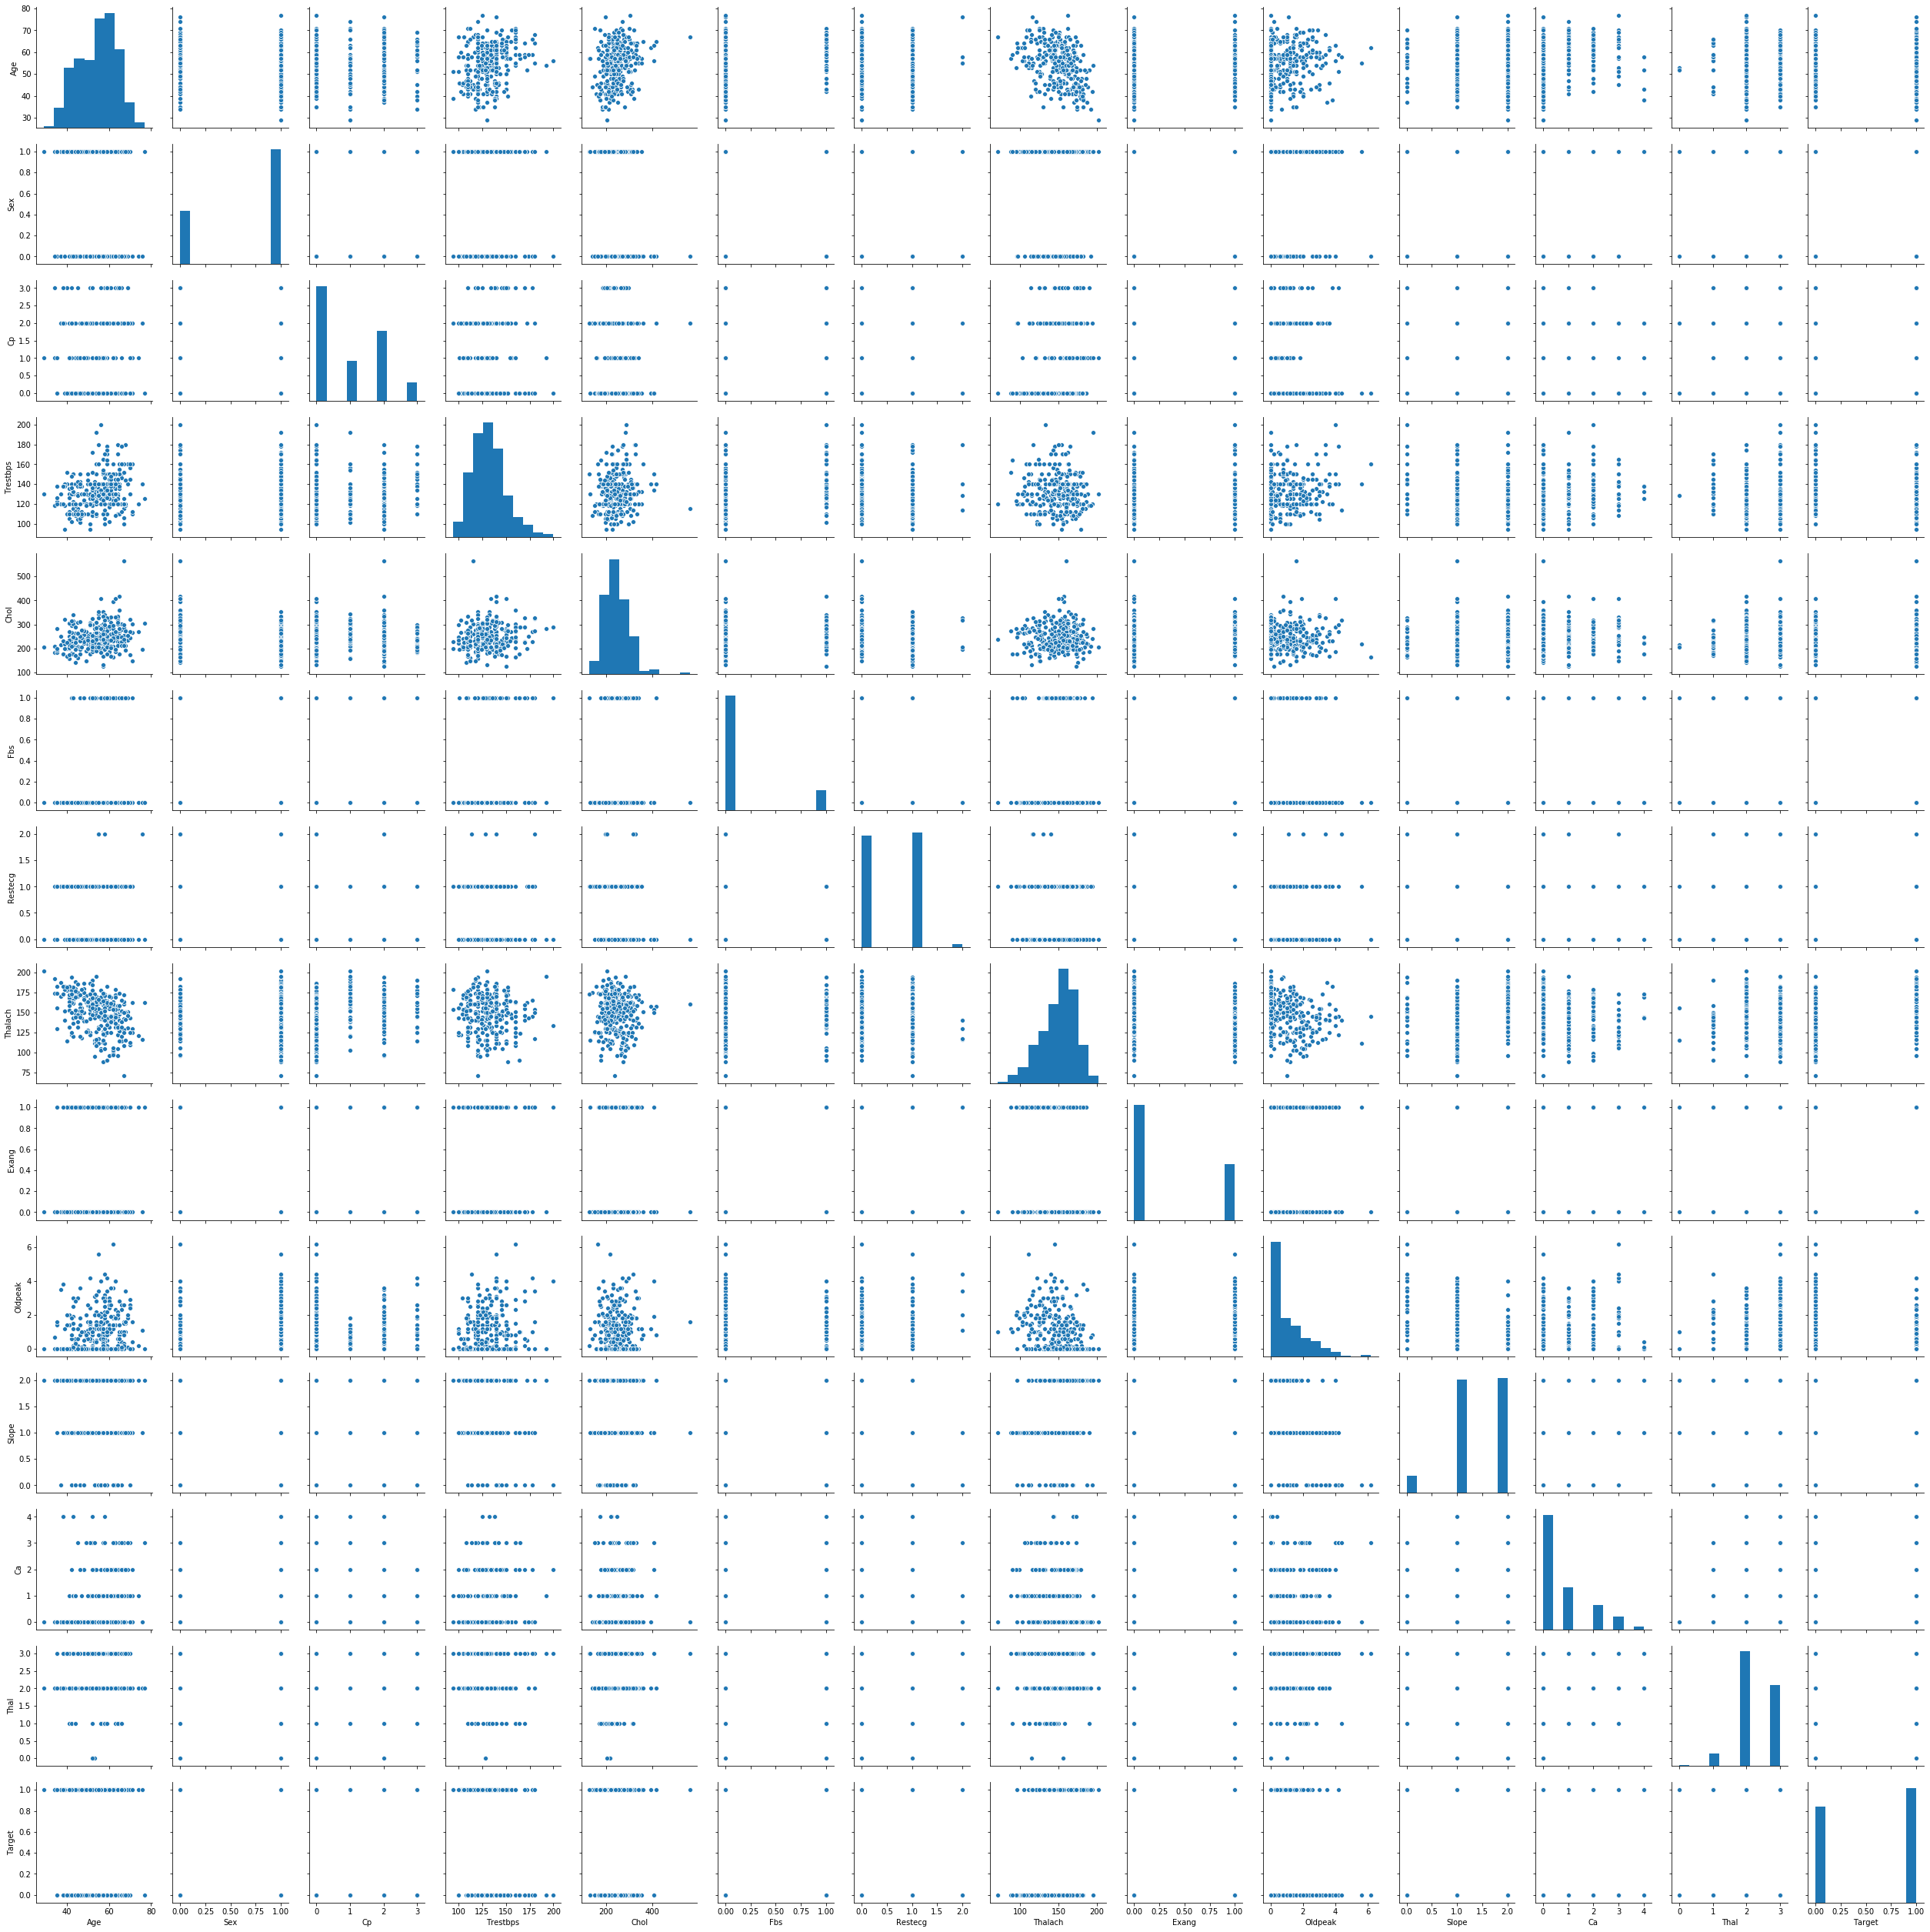

In [16]:
sns.pairplot(data)
plt.show()

In [17]:
data.Age.value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

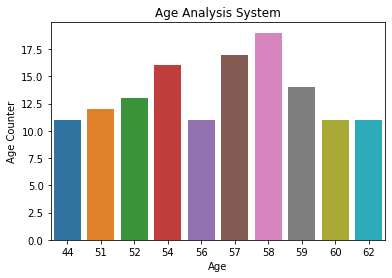

In [18]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [19]:
#firstly find min and max ages
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [20]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


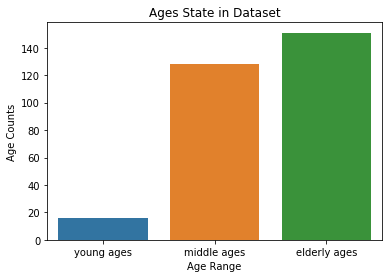

In [21]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

In [22]:
data['AgeRange']=0
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

In [23]:
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

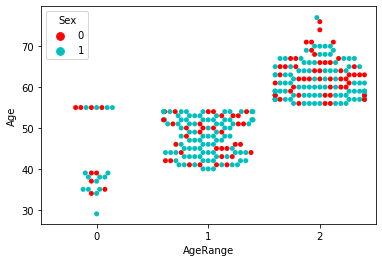

In [24]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data)
plt.show()

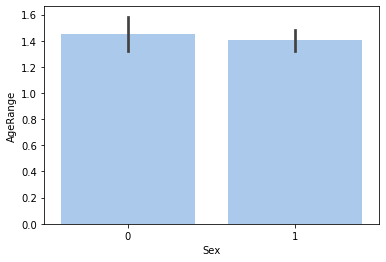

In [25]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="Sex", data=data,
            label="Total", color="b")
plt.show()

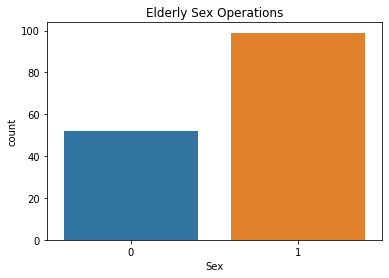

In [26]:
sns.countplot(elderly_ages.Sex)
plt.title("Elderly Sex Operations")
plt.show()

In [27]:
elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum')

Sex
0     7578
1    13948
Name: Thalach, dtype: int64

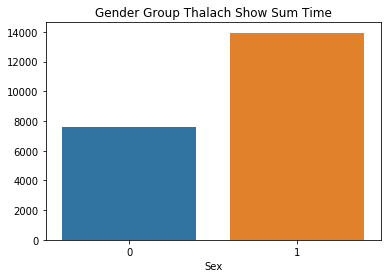

In [28]:
sns.barplot(x=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').index,y=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').values)
plt.title("Gender Group Thalach Show Sum Time")
plt.show()

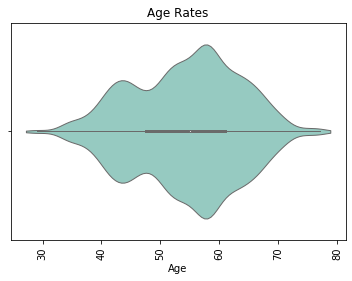

In [29]:
sns.violinplot(data.Age, palette="Set3", bw=.2, cut=1, linewidth=1)
plt.xticks(rotation=90)
plt.title("Age Rates")
plt.show()

No handles with labels found to put in legend.


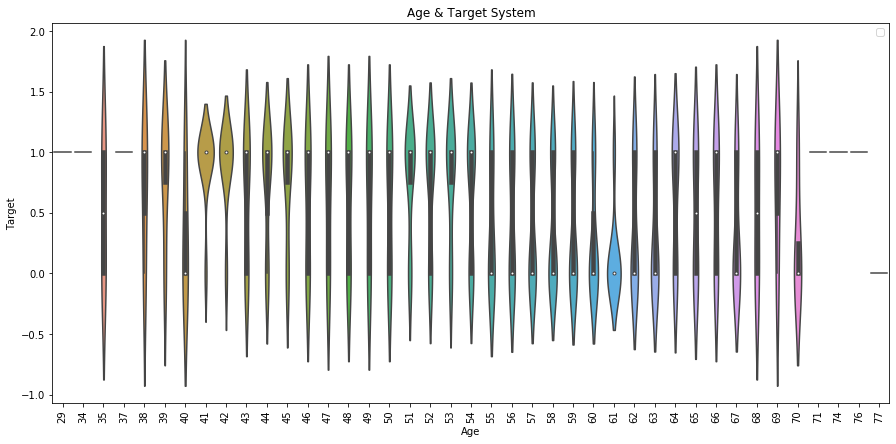

In [30]:
plt.figure(figsize=(15,7))
sns.violinplot(x=data.Age,y=data.Target)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

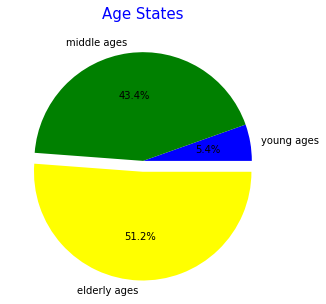

In [31]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

In [32]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

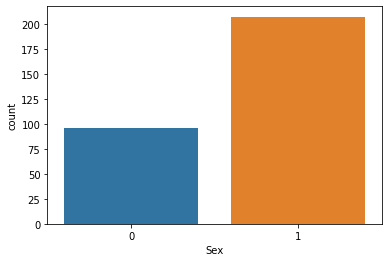

In [33]:
#Sex (1 = male; 0 = female)
sns.countplot(data.Sex)
plt.show()

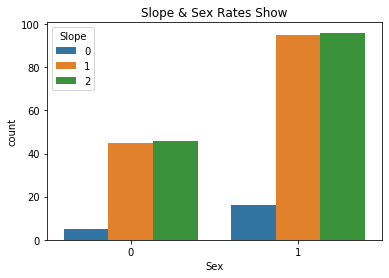

In [34]:
sns.countplot(data.Sex,hue=data.Slope)
plt.title('Slope & Sex Rates Show')
plt.show()

In [35]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


In [36]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 68.32%
Female State: 31.68%


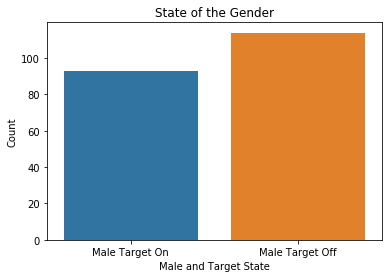

In [37]:
#Male State & target 1 & 0
male_andtarget_on=len(data[(data.Sex==1)&(data['Target']==1)])
male_andtarget_off=len(data[(data.Sex==1)&(data['Target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

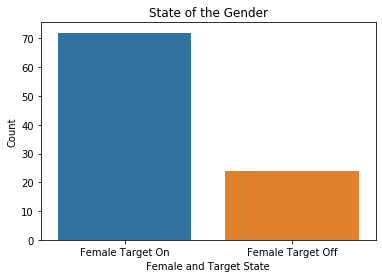

In [38]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.Sex==0)&(data['Target']==1)])
female_andtarget_off=len(data[(data.Sex==0)&(data['Target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

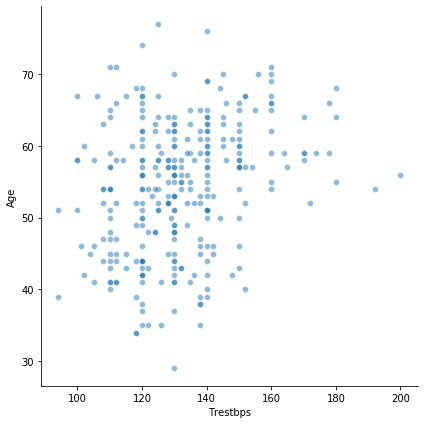

In [39]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Trestbps", y="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

In [40]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [41]:
#As seen, there are 4 types of chest pain.
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

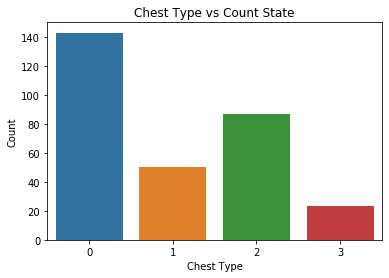

In [42]:
sns.countplot(data.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

In [43]:
cp_zero_target_zero=len(data[(data.Cp==0)&(data.Target==0)])
cp_zero_target_one=len(data[(data.Cp==0)&(data.Target==1)])

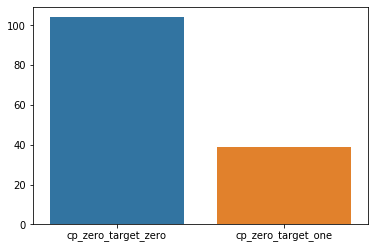

In [44]:
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

In [45]:
cp_one_target_zero=len(data[(data.Cp==1)&(data.Target==0)])
cp_one_target_one=len(data[(data.Cp==1)&(data.Target==1)])

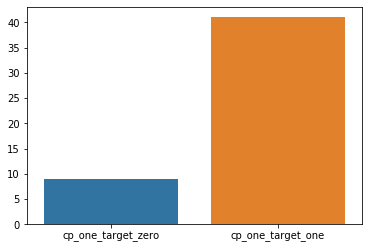

In [46]:
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [47]:
cp_two_target_zero=len(data[(data.Cp==2)&(data.Target==0)])
cp_two_target_one=len(data[(data.Cp==2)&(data.Target==1)])

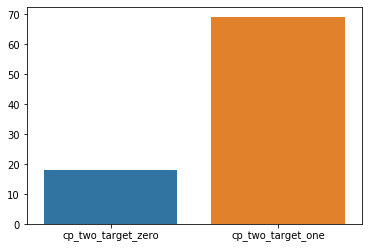

In [48]:
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [49]:
cp_three_target_zero=len(data[(data.Cp==3)&(data.Target==0)])
cp_three_target_one=len(data[(data.Cp==3)&(data.Target==1)])

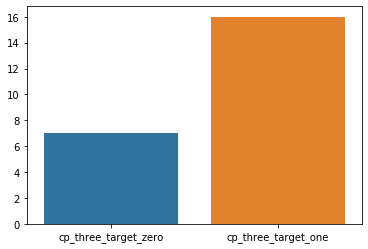

In [50]:
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

In [51]:
data.head(1)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2


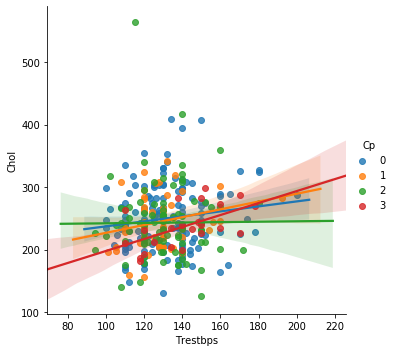

In [52]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Trestbps", y="Chol",data=data,hue="Cp")
plt.show()

In [53]:
target_0_agerang_0=len(data[(data.Target==0)&(data.AgeRange==0)])
target_1_agerang_0=len(data[(data.Target==1)&(data.AgeRange==0)])

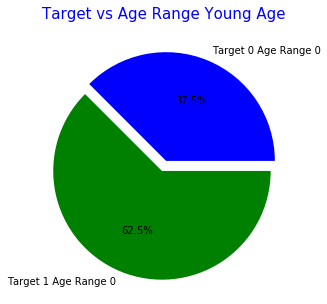

In [54]:
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

In [55]:
target_0_agerang_1=len(data[(data.Target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.Target==1)&(data.AgeRange==1)])

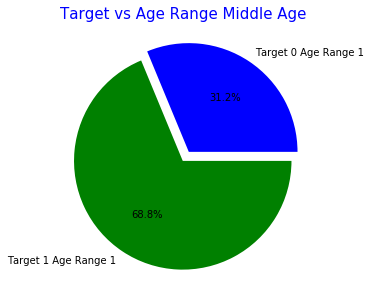

In [56]:
colors = ['blue','green']
explode = [0.1,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [57]:
target_0_agerang_2=len(data[(data.Target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.Target==1)&(data.AgeRange==2)])

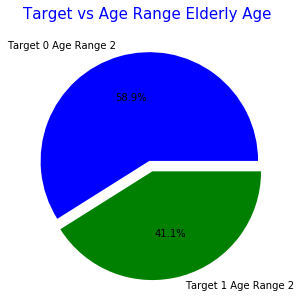

In [58]:
colors = ['blue','green']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

In [59]:
data.Thalach.value_counts()[:20]
#First show 20 rows

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Thalach, dtype: int64

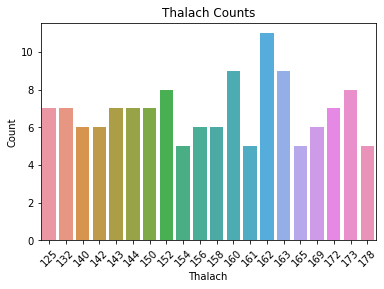

In [60]:
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

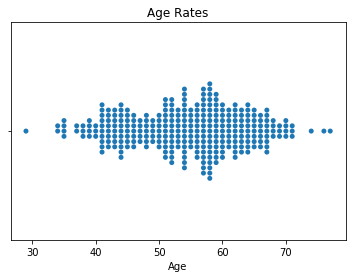

In [61]:
sns.swarmplot(x=data.Age)
plt.title('Age Rates')
plt.show()

In [62]:
age_unique=sorted(data.Age.unique())
age_thalach_values=data.groupby('Age')['Thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age']==age].Thalach)/age_thalach_values[i])

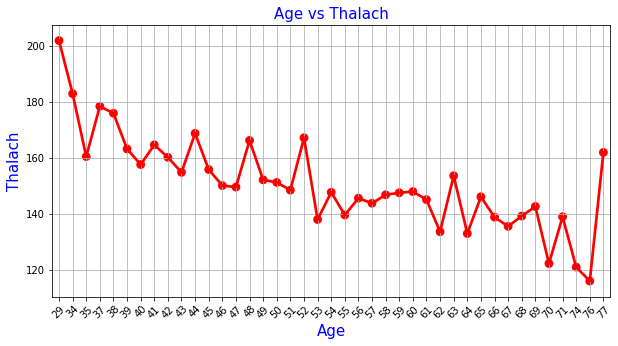

In [63]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [64]:
age_range_thalach=data.groupby('AgeRange')['Thalach'].mean()

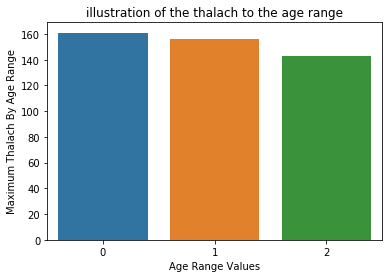

In [65]:
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [66]:
cp_thalach=data.groupby('Cp')['Thalach'].mean()

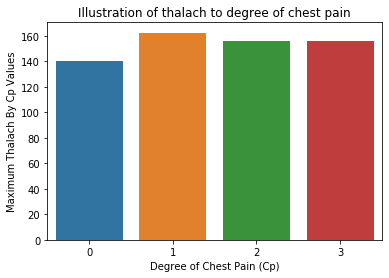

In [67]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

In [68]:
data.Thal.value_counts()

2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

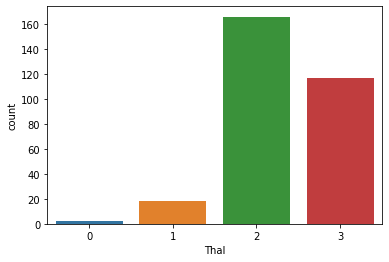

In [69]:
sns.countplot(data.Thal)
plt.show()

In [70]:
data[(data.Thal==0)]
#as seen, only 50% was understood to be 50% target.

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,1


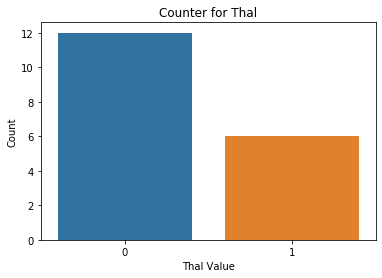

In [71]:
data[(data['Thal']==1)].Target.value_counts()
sns.barplot(x=data[(data['Thal']==1)].Target.value_counts().index,y=data[(data['Thal']==1)].Target.value_counts().values)
plt.xlabel('Thal Value')
plt.ylabel('Count')
plt.title('Counter for Thal')
plt.show()

In [72]:
#Target 1
a=len(data[(data['Target']==1)&(data['Thal']==0)])
b=len(data[(data['Target']==1)&(data['Thal']==1)])
c=len(data[(data['Target']==1)&(data['Thal']==2)])
d=len(data[(data['Target']==1)&(data['Thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(data[(data['Target']==0)&(data['Thal']==0)])
f=len(data[(data['Target']==0)&(data['Thal']==1)])
g=len(data[(data['Target']==0)&(data['Thal']==2)])
h=len(data[(data['Target']==0)&(data['Thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
**************************************************
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


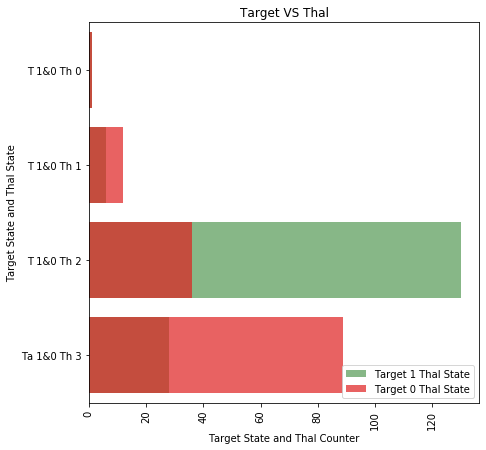

In [73]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()
#so, there has been a very nice graphic display. This is the situation that best describes the situation.

In [74]:
data.Target.unique()
#only two values are shown.
#A value of 1 is the value of patient 0.

array([1, 0], dtype=int64)

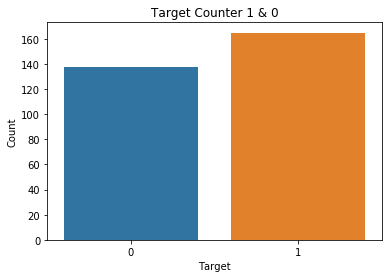

In [75]:
sns.countplot(data.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

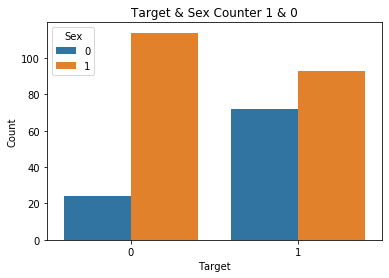

In [76]:
sns.countplot(data.Target,hue=data.Sex)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Sex Counter 1 & 0')
plt.show()


In [77]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in data.Age.unique():
    age_counter_target_1.append(len(data[(data['Age']==age)&(data.Target==1)]))
    age_counter_target_0.append(len(data[(data['Age']==age)&(data.Target==0)]))

#now, draw show on graph 

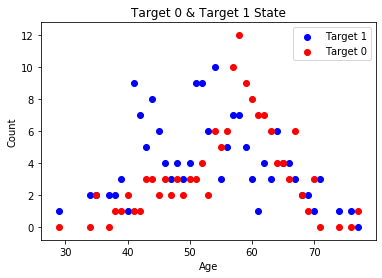

In [78]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=data.Age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=data.Age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

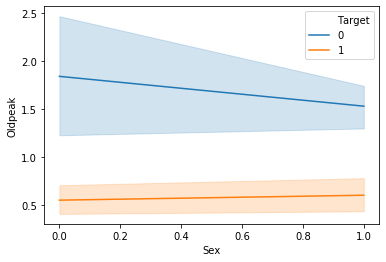

In [79]:
sns.lineplot(x="Sex", y="Oldpeak",
             hue="Target",data=data)
plt.show()

In [80]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [81]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


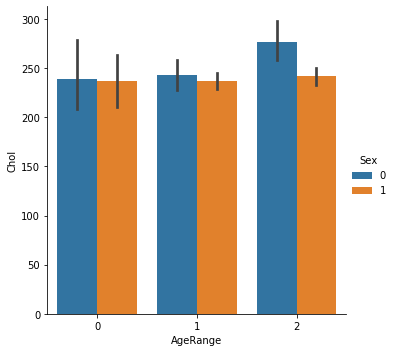

In [82]:
g = sns.catplot(x="AgeRange", y="Chol",
                 hue="Sex",
                 data=data, kind="bar")
plt.show()

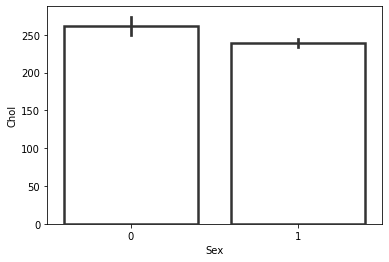

In [83]:
ax = sns.barplot("Sex", "Chol", data=data,
                  linewidth=2.5, facecolor=(1, 1, 1, 0),
                  errcolor=".2", edgecolor=".2")
plt.show()

In [84]:
male_young_t_1=data[(data['Sex']==1)&(data['AgeRange']==0)&(data['Target']==1)]
male_middle_t_1=data[(data['Sex']==1)&(data['AgeRange']==1)&(data['Target']==1)]
male_elderly_t_1=data[(data['Sex']==1)&(data['AgeRange']==2)&(data['Target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

8
55
30


No handles with labels found to put in legend.


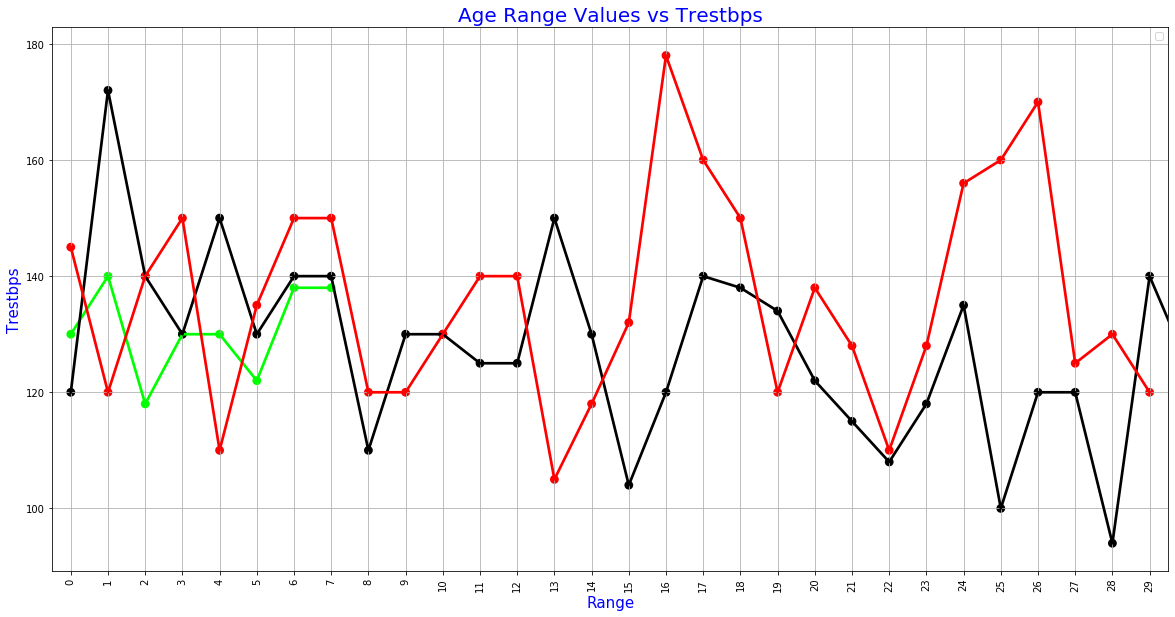

In [85]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.Trestbps,color='lime',alpha=0.8,label='Young')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.Trestbps,color='black',alpha=0.8,label='Middle')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.Trestbps,color='red',alpha=0.8,label='Elderly')
plt.xlabel('Range',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Trestbps',fontsize = 15,color='blue')
plt.title('Age Range Values vs Trestbps',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [86]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [87]:
data_filter_mean=data[(data['Target']==1)&(data['Age']>50)].groupby('Sex')[['Trestbps','Chol','Thalach']].mean()

In [88]:
data_filter_mean.unstack()

          Sex
Trestbps  0      132.804348
          1      132.396226
Chol      0      274.500000
          1      230.132075
Thalach   0      149.217391
          1      154.566038
dtype: float64

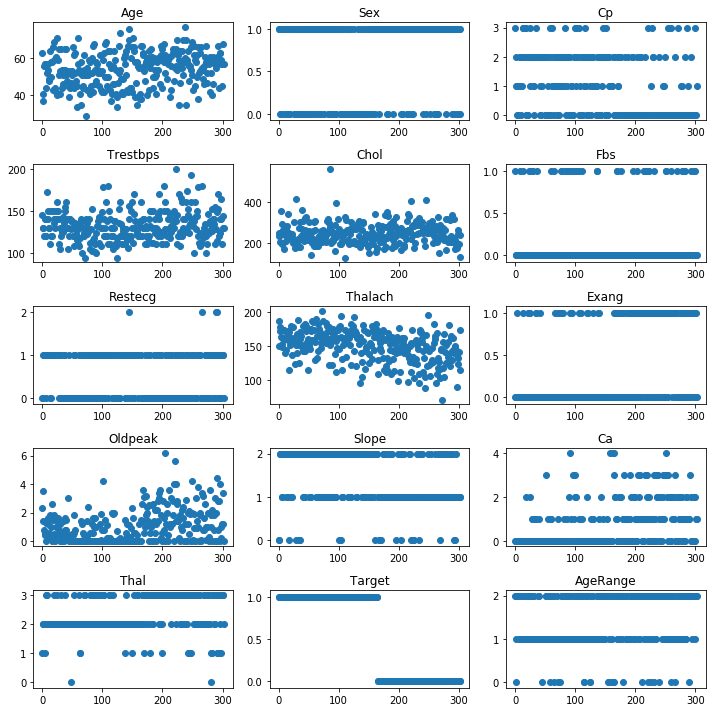

In [89]:
for i,col in enumerate(data.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

In [90]:
#Let's see how the correlation values between them
data.corr()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.808707
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.030911
Cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.079877
Trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.214313
Chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.138688
Fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.133788
Restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.179119
Thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.306015
Exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.072205
Oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.155264


In [91]:
dataX=data.drop('Target',axis=1)
dataY=data['Target']

In [92]:
dataX=data.drop('Target',axis=1)
dataY=data['Target']

In [93]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [94]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 14)
X_test (61, 14)
y_train (242,)
y_test (61,)


In [95]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [96]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.25069557 0.17935193 0.12879318 0.09556117 0.07603197 0.06460611
 0.05580481 0.04257635 0.02999253 0.02360139 0.02075818 0.0156925
 0.01026596 0.00626834]

['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AgeRange']
[[ 8.81347322e-02  4.65342239e-01 -3.12452745e-01  1.31979053e-02
  -2.64386397e-03  1.94504864e-02 -3.71456984e-02 -1.75249277e-01
   7.17707790e-01  1.68676245e-01 -2.23545648e-01  1.20887016e-01
   1.28737326e-01  1.43856767e-01]
 [ 1.62605861e-01 -8.54520916e-01 -2.04167585e-01  6.49323130e-02
   6.97159523e-02 -2.53324239e-02 -7.27306422e-03 -1.29131596e-01
   3.18807628e-01  4.99567080e-02 -1.41977238e-01 -5.38494882e-03
  -3.12811740e-02  2.23436334e-01]
 [ 3.23243751e-01  1.05671125e-01  2.09016455e-01  1.17663387e-01
   3.88361436e-02  5.11356159e-01 -2.02594772e-01 -7.34055729e-02
  -2.67149471e-01  5.70813735e-02 -1.18879224e-01  2.18032882e-01
  -2.85637322e-02  6.16664038e-01]
 [-1.65405805e-01 

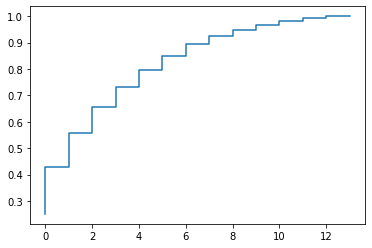

In [97]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

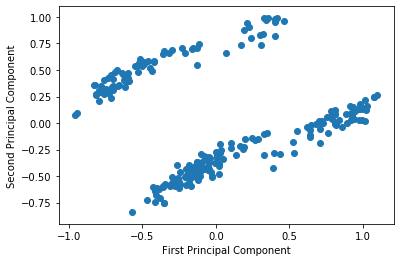

In [98]:
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

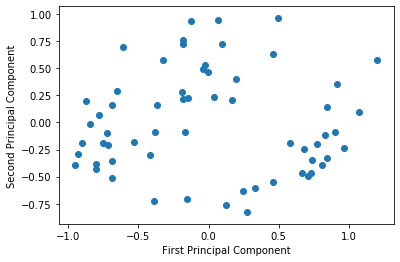

In [99]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [100]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [101]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [102]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

In [103]:
#knn
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 12}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       109
           1       0.83      0.76      0.79       133

    accuracy                           0.78       242
   macro avg       0.78      0.78      0.78       242
weighted avg       0.79      0.78      0.78       242

**************************************************
Train Confusion Matrix:
[[ 88  21]
 [ 32 101]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79     

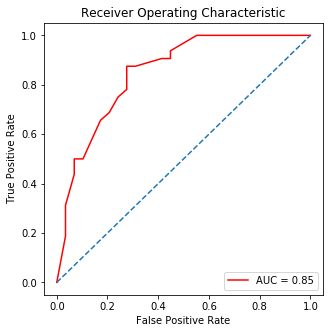

Accurancy Oranı : 0.8032786885245902
KNN TRAIN score with  0.7851239669421488
KNN TEST score with  0.8032786885245902

[[21  8]
 [ 4 28]]


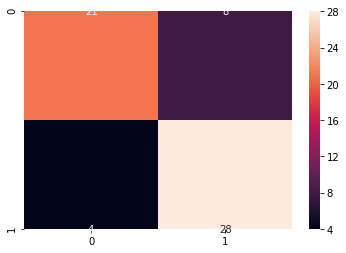

In [104]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

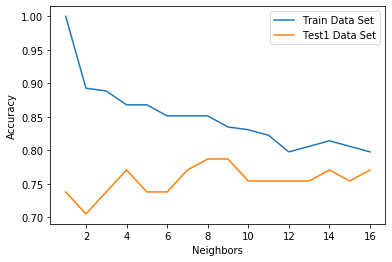

In [105]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [106]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8068181818181818, 0.7700757575757576, 0.8238636363636364, 0.8034090909090911, 0.8276515151515152, 0.8068181818181818, 0.7984848484848484, 0.8022727272727272, 0.765151515151515, 0.768939393939394, 0.7693181818181819, 0.7481060606060606, 0.7606060606060606, 0.7564393939393939, 0.768560606060606, 0.7643939393939395]


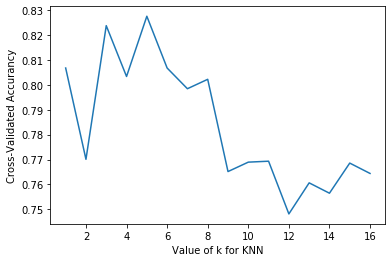

In [107]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [108]:
print('Leaf Size :',knn.leaf_size)
print('Metric :',knn.metric_params)
print('Radius :',knn.radius)
print('Weights :',knn.weights)
print('Algorithms :',knn.algorithm)

Leaf Size : 30
Metric : None
Radius : None
Weights : uniform
Algorithms : auto


In [113]:
#naivabayes
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 6, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       109
           1       0.81      0.85      0.83       133

    accuracy                           0.81       242
   macro avg       0.81      0.80      0.80       242
weighted avg       0.81      0.81      0.81       242

**************************************************
Train Confusion Matrix:
[[ 82  27]
 [ 20 113]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.76      0.66      0.70        29
           1       0.72      0.81      

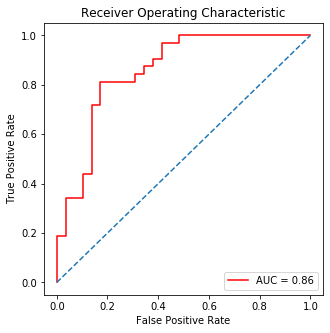

Accurancy Oranı : 0.7704918032786885
SVC TRAIN score with  0.8140495867768595
SVC TEST score with  0.7704918032786885

[[20  9]
 [ 5 27]]


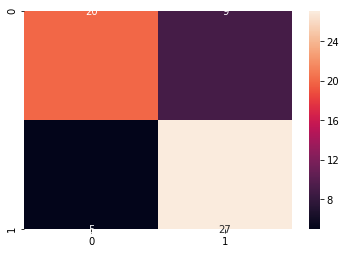

In [114]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [115]:
print('Coef :',svc.coef0)
print('Dual Coef_',svc.dual_coef_)
print('Fit Status :',svc.fit_status_)
print('Gamma :',svc.gamma)
print('Kernel :',svc.kernel)
print('SV :',svc.support_vectors_)
print('Probablity :',svc.probability)

Coef : 0.0
Dual Coef_ [[-5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -0.96732361 -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -1.39769137 -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -5.         -5.         -5.
  -5.         -2.06369507 -5.         -5.         -5.         -5.
  -5.         -5.         -5.         -3.77204316 -5.         -5.
  -5.          4.24991139  5.          5.          5.          5.
   5.          5.          5.          5.          5.          2.56904229
   5.          5.          5.          5.          5.          5.
   5.          5.          5.          5.          5.          5.
   5.          5.          5.          5.     

In [116]:
#decisiontree
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

**************************************************
Train Confusion Matrix:
[[109   0]
 [  0 133]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.65      0.75      0.70        32

    accuracy                           0.66        61
  

In [117]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       109
           1       0.75      0.88      0.81       133

    accuracy                           0.77       242
   macro avg       0.78      0.76      0.76       242
weighted avg       0.78      0.77      0.76       242

**************************************************
Train Confusion Matrix:
[[ 69  40]
 [ 16 117]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
  